Machine Learning Capstone Project

Data Undestanding

In [ ]:
import pandas as pd

In [ ]:
path = '/content/drive/MyDrive/dataset/laptop.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.shape

(1303, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


It tells size or shape of the dataset

In [ ]:
df.dtypes

,0
Unnamed: 0.1,int64
Unnamed: 0,float64
Company,object
TypeName,object
Inches,object
ScreenResolution,object
Cpu,object
Ram,object
Memory,object
Gpu,object


tells the data type of each column

In [ ]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,1303.00000,1273.000000,1273.000000
mean,651.00000,652.674784,59955.814073
std,376.28801,376.493027,37332.251005
min,0.00000,0.000000,9270.720000
25%,325.50000,327.000000,31914.720000
50%,651.00000,652.000000,52161.120000
75%,976.50000,980.000000,79333.387200
max,1302.00000,1302.000000,324954.720000


describe function calculates statistical summary on numerical coulmns.

Maximum laptop price is 3,24,954,Minimum price 9270

In [ ]:
df['Unnamed: 0'].value_counts()

,count
Unnamed: 0,
1302.0,1
0.0,1
1.0,1
2.0,1
3.0,1
...,...
13.0,1
12.0,1
11.0,1


In [ ]:
df['Unnamed: 0.1'].value_counts()

,count
Unnamed: 0.1,
1302,1
0,1
1,1
2,1
3,1
...,...
11,1
10,1
9,1


In [ ]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)


dropping out the unwanted columns.

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.dtypes

,0
Company,object
TypeName,object
Inches,object
ScreenResolution,object
Cpu,object
Ram,object
Memory,object
Gpu,object
OpSys,object
Weight,object


**Data** **cleaning**

In [ ]:
df['Inches'] = pd.to_numeric(df['Inches'], errors='coerce')


Inches columns is of object we need to convert it into numerical so we use to_numeric and coerce handles the NaN values without raising error.

In [ ]:
df['Ram'] = df['Ram'].str.replace('GB', '', regex=False)   # Remove 'GB'
df['Ram'] = pd.to_numeric(df['Ram'], errors='coerce')      # Convert to number


In Ram column we have data like 8GB,16GB etc and its in object we need to convert into numeric by replacing 'GB' with space,regex=False because its not a plain-text.

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df['Ram'].unique()

array([ 8., 16.,  4., nan,  2., 12., 64.,  6., 32., 24.,  1.])

In [ ]:
df['Ram'].isnull().sum()

np.int64(30)

In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1047
No OS,63
Linux,61
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,1


we are combing same type of catogory into one catogory , by using replace function.

In [ ]:
df['OpSys'] = df['OpSys'].replace({'Mac OS X': 'macOS', 'Windows 10 S': 'Windows','Windows 10' : 'Windows','Windows 7': 'Windows'})


here we used repalace and mapping similar columns together

In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows,1100
No OS,63
Linux,61
Chrome OS,27
macOS,21
Android,1


In [ ]:
df['Weight'] = df['Weight'].str.replace('kg','',regex=False)
df['Weight'] = pd.to_numeric(df['Weight'],errors='coerce')

we have converted weight column from object to float,regex = False i.e it is not a plain-text.

In [ ]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,495
1366x768,274
IPS Panel Full HD 1920x1080,226
IPS Panel Full HD / Touchscreen 1920x1080,52
Full HD / Touchscreen 1920x1080,45
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,14
IPS Panel 4K Ultra HD 3840x2160,12


In [ ]:
# Extract resolution numbers
df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')

# Extract features as booleans
df['Is_Touchscreen'] = df['ScreenResolution'].str.contains('Touchscreen', case=False, na=False)
df['Is_IPS_Panel'] = df['ScreenResolution'].str.contains('IPS Panel', case=False, na=False)
df['Is_Retina'] = df['ScreenResolution'].str.contains('Retina Display', case=False, na=False)


# Convert booleans to 0/1
df['Is_Touchscreen'] = df['Is_Touchscreen'].astype(int)
df['Is_IPS_Panel'] = df['Is_IPS_Panel'].astype(int)
df['Is_Retina'] = df['Is_Retina'].astype(int)

# Categorize resolutions
def categorize_resolution(res):
    if pd.isna(res):
        return 'Unknown'
    if res == '1920x1080':
        return 'Full HD'
    elif res == '3200x1800':
        return 'Quad HD+'
    elif res == '3840x2160':
        return '4K Ultra HD'
    else:
        return 'Other'

df['Resolution_Category'] = df['Resolution'].apply(categorize_resolution)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution,Is_Touchscreen,Is_IPS_Panel,Is_Retina,Resolution_Category
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,0,1,1,Other
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,0,0,0,Other
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080,0,0,0,Full HD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,0,1,1,Other
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,0,1,1,Other


In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution,Is_Touchscreen,Is_IPS_Panel,Is_Retina,Resolution_Category
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,0,1,1,Other
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,0,0,0,Other
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080,0,0,0,Full HD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,0,1,1,Other
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,0,1,1,Other


In [ ]:
df['Resolution_Category'].value_counts()

,count
Resolution_Category,
Full HD,822
Other,383
4K Ultra HD,42
Unknown,30
Quad HD+,26


In [ ]:
df.head(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Cpu_speed,Gpu_Brand,clean_memory,Extracted_Sizes,Sizes_Int,Total_memory_GB,Is_SSD,Is_HDD,Is_Flash_Storage,IS_Hybrid
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,2.3,Intel,128GB SSD,[128],[128],128,1,0,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,1.8,Intel,128GB Flash Storage,[128],[128],128,0,0,1,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,2.5,Intel,256GB SSD,[256],[256],256,1,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,2.7,AMD,512GB SSD,[512],[512],512,1,0,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,3.1,Intel,256GB SSD,[256],[256],256,1,0,0,0
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4.0,500GB HDD,AMD Radeon R5,Windows,2.10,...,3.0,AMD,500GB HDD,[500],[500],500,0,1,0,0
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16.0,256GB Flash Storage,Intel Iris Pro Graphics,macOS,2.04,...,2.2,Intel,256GB Flash Storage,[256],[256],256,0,0,1,0
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,1.8,Intel,256GB Flash Storage,[256],[256],256,0,0,1,0
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16.0,512GB SSD,Nvidia GeForce MX150,Windows,1.30,...,1.8,Nvidia,512GB SSD,[512],[512],512,1,0,0,0
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8.0,256GB SSD,Intel UHD Graphics 620,Windows,1.60,...,1.6,Intel,256GB SSD,[256],[256],256,1,0,0,0


In [ ]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', nan, 'Intel Core i5 7300HQ 2.5GHz',
       'AMD E-Series E2-9000e 1.5GHz', 'Intel Core i5 1.6GHz',
       'Intel Core i7 8650U 1.9GHz', 'Intel Atom x5-Z8300 1.44GHz',
       'AMD E-Series E2-6110 1.5GHz', 'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Core i5 1.3GHz',
       'AMD FX 9830P 3GH

cleaning for CPU
1.extract Brand type.

In [ ]:
df['CPU_Brand'] = df['Cpu'].str.split().str[0]

In [ ]:
df['CPU_Brand'].value_counts()

,count
CPU_Brand,
Intel,1210
AMD,62
Samsung,1


extracting cpu type like i3,i5,i7,i9 Ryzen etc by importing regular expression and using search to find the string in cpu column.

In [ ]:
import re

def extract_cpu_type(cpu):
    if pd.isna(cpu):
        return 'Unknown'
    match = re.search(r'i[3579]|Ryzen|Pentium|Celeron|Atom|Xeon|A10|A12|A[0-9]|FX|Core M|E-Series', cpu)
    return match.group() if match else 'Other'

df['CPU_Type'] = df['Cpu'].apply(extract_cpu_type)


In [ ]:
df['CPU_Type'].value_counts()

,count
CPU_Type,
i7,515
i5,410
i3,134
Celeron,87
Unknown,30
Pentium,30
Core M,19
A9,17
A6,11


In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution,Is_Touchscreen,Is_IPS_Panel,Is_Retina,Resolution_Category,CPU_Brand,CPU_Type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,0,1,1,Other,Intel,i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,0,0,0,Other,Intel,i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080,0,0,0,Full HD,Intel,i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,0,1,1,Other,Intel,i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,0,1,1,Other,Intel,i5


In [ ]:
df['Cpu_speed'] = df['Cpu'].str.extract(r'(\d+\.\d+|\d+)\s*GHz')
df['Cpu_speed'] = df['Cpu_speed'].astype(float)

**we are extracting the cpu speed by using str.extract in pandas and using regex patterns i.e **

-->\d+ means a number like 2 (one or more digits)
-->\. matches the decimal point
-->\d+ again matches a number like 4
-->So \d+\.\d+ matches something like 2.4
-->|(or) \d+ also matches whole numbers like 7
-->\s means matches a whitespace character (like space, tab)
-->\s* means zero or more whitespace characters
-->\s*GHz means optional spaces before 'GHz'

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution,Is_Touchscreen,Is_IPS_Panel,Is_Retina,Resolution_Category,CPU_Brand,CPU_Type,Cpu_speed
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,0,1,1,Other,Intel,i5,2.3
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,0,0,0,Other,Intel,i5,1.8
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080,0,0,0,Full HD,Intel,i5,2.5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,0,1,1,Other,Intel,i7,2.7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,0,1,1,Other,Intel,i5,3.1


In [ ]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', nan, 'Nvidia GeForce GTX 1050',
       'AMD Radeon R2', 'AMD Radeon 530', 'Nvidia GeForce 930MX',
       'Intel HD Graphics', 'Intel HD Graphics 500',
       'Nvidia GeForce 930MX ', 'Nvidia GeForce GTX 1060',
       'Nvidia GeForce 150MX', 'Intel Iris Graphics 540',
       'AMD Radeon RX 580', 'Nvidia GeForce 920MX',
       'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 400', 'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       

In [ ]:
import pandas as pd
def extarct_gpu_brand(gpu):
  if pd.isna(gpu):
    return 'Unknown'
  elif 'Intel' in gpu:
    return 'Intel'
  elif 'AMD' in gpu:
    return 'AMD'
  elif 'Nvidia' in gpu:
    return 'Nvidia'
  elif 'ARM' in gpu:
    return 'ARM'
  else:
    return 'Other'
df['Gpu_Brand'] = df['Gpu'].apply(extarct_gpu_brand)

we are extracting Gpu brand from Gpu column

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution,Is_Touchscreen,Is_IPS_Panel,Is_Retina,Resolution_Category,CPU_Brand,CPU_Type,Cpu_speed,Gpu_Brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,0,1,1,Other,Intel,i5,2.3,Intel
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,0,0,0,Other,Intel,i5,1.8,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080,0,0,0,Full HD,Intel,i5,2.5,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,0,1,1,Other,Intel,i7,2.7,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,0,1,1,Other,Intel,i5,3.1,Intel


In [ ]:
df['Gpu_Brand'].value_counts()

,count
Gpu_Brand,
Intel,703
Nvidia,393
AMD,176
Unknown,30
ARM,1


In [ ]:
df['Gpu_Brand'].unique()

array(['Intel', 'AMD', 'Nvidia', 'Unknown', 'ARM'], dtype=object)

In [ ]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,401
1TB HDD,217
500GB HDD,130
512GB SSD,116
128GB SSD + 1TB HDD,92
128GB SSD,74
256GB SSD + 1TB HDD,71
32GB Flash Storage,37
2TB HDD,16


In [ ]:
df['clean_memory'] = df['Memory'].str.replace('TB','000GB')

128GB SSD + 1TB HDD as we have columns like this we convert TB to GB as 1TB = 1000GB so we are using replace function so it replace's 'TB' with '000GB'.

In [ ]:
df['clean_memory'].value_counts()

,count
clean_memory,
256GB SSD,401
1000GB HDD,217
500GB HDD,130
512GB SSD,116
128GB SSD + 1000GB HDD,92
128GB SSD,74
256GB SSD + 1000GB HDD,71
32GB Flash Storage,37
2000GB HDD,16


In [ ]:
df['Extracted_Sizes'] = df['clean_memory'].str.findall(r'(\d+)GB')


In [ ]:
df['Extracted_Sizes'].value_counts()

,count
Extracted_Sizes,
[256],409
[1000],230
[500],130
[512],118
"[128, 1000]",92
[128],79
"[256, 1000]",71
[32],44
[2000],16


In [ ]:
import re

def extract_sizes(memory):
    if pd.isna(memory):
        return []

    memory = memory.upper()
    sizes = []

    matches = re.findall(r'(\d+\.?\d*)\s*(GB|TB)', memory)
    for size, unit in matches:
        size = float(size)
        if unit == 'TB':
            size *= 1000
        sizes.append(int(size))  # optional: you can keep it as float if you want
    return sizes

df['Sizes_Int'] = df['Memory'].apply(extract_sizes)


In [ ]:
df['Sizes_Int'].value_counts()

,count
Sizes_Int,
[256],409
[1000],240
[500],130
[512],118
"[128, 1000]",92
[128],79
"[256, 1000]",72
[32],44
[],31


In [ ]:
df['Total_memory_GB'] = df['Sizes_Int'].apply(lambda x: sum(x))


In [ ]:
df['Total_memory_GB'].value_counts()

,count
Total_memory_GB,
256,409
1000,240
500,130
512,120
1128,92
128,79
1256,72
32,44
0,31


In [ ]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Is_Retina,Resolution_Category,CPU_Brand,CPU_Type,Cpu_speed,Gpu_Brand,clean_memory,Extracted_Sizes,Sizes_Int,Total_memory_GB
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,1,Other,Intel,i5,2.3,Intel,128GB SSD,[128],[128],128
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,0,Other,Intel,i5,1.8,Intel,128GB Flash Storage,[128],[128],128
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,0,Full HD,Intel,i5,2.5,Intel,256GB SSD,[256],[256],256
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,1,Other,Intel,i7,2.7,AMD,512GB SSD,[512],[512],512
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,1,Other,Intel,i5,3.1,Intel,256GB SSD,[256],[256],256


In [ ]:
df['Is_SSD'] = df['Memory'].str.contains('SSD', case=False, na=False).astype(int)
df['Is_HDD'] = df['Memory'].str.contains('HDD', case=False, na=False).astype(int)
df['Is_Flash_Storage'] = df['Memory'].str.contains('Flash Storage', case=False, na=False).astype(int)
df['IS_Hybrid'] = df['Memory'].str.contains('Hybrid', case=False, na=False).astype(int)

In [ ]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Cpu_speed,Gpu_Brand,clean_memory,Extracted_Sizes,Sizes_Int,Total_memory_GB,Is_SSD,Is_HDD,Is_Flash_Storage,IS_Hybrid
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,2.3,Intel,128GB SSD,[128],[128],128,1,0,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,1.8,Intel,128GB Flash Storage,[128],[128],128,0,0,1,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,2.5,Intel,256GB SSD,[256],[256],256,1,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,2.7,AMD,512GB SSD,[512],[512],512,1,0,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,3.1,Intel,256GB SSD,[256],[256],256,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows,1.80,...,2.5,Intel,128GB SSD,[128],[128],128,1,0,0,0
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,Windows,1.30,...,2.5,Intel,512GB SSD,[512],[512],512,1,0,0,0
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows,1.50,...,1.6,Intel,64GB Flash Storage,[64],[64],64,0,0,1,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows,2.19,...,2.5,AMD,1000GB HDD,[1000],[1000],1000,0,1,0,0


In [ ]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Resolution',
       'Is_Touchscreen', 'Is_IPS_Panel', 'Is_Retina', 'Resolution_Category',
       'CPU_Brand', 'CPU_Type', 'Cpu_speed', 'Gpu_Brand', 'clean_memory',
       'Extracted_Sizes', 'Sizes_Int', 'Total_memory_GB', 'Is_SSD', 'Is_HDD',
       'Is_Flash_Storage', 'IS_Hybrid'],
      dtype='object')

In [ ]:
newdf = df.copy()


In [ ]:
cols_to_drop = ['ScreenResolution', 'Cpu', 'Memory', 'Gpu',
                'clean_memory', 'Extracted_Sizes', 'Sizes_Int']

newdf.drop(columns=cols_to_drop, inplace=True)


In [ ]:
newdf.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Resolution,Is_Touchscreen,Is_IPS_Panel,...,Resolution_Category,CPU_Brand,CPU_Type,Cpu_speed,Gpu_Brand,Total_memory_GB,Is_SSD,Is_HDD,Is_Flash_Storage,IS_Hybrid
0,Apple,Ultrabook,13.3,8.0,macOS,1.37,71378.6832,2560x1600,0,1,...,Other,Intel,i5,2.3,Intel,128,1,0,0,0
1,Apple,Ultrabook,13.3,8.0,macOS,1.34,47895.5232,1440x900,0,0,...,Other,Intel,i5,1.8,Intel,128,0,0,1,0
2,HP,Notebook,15.6,8.0,No OS,1.86,30636.0000,1920x1080,0,0,...,Full HD,Intel,i5,2.5,Intel,256,1,0,0,0
3,Apple,Ultrabook,15.4,16.0,macOS,1.83,135195.3360,2880x1800,0,1,...,Other,Intel,i7,2.7,AMD,512,1,0,0,0
4,Apple,Ultrabook,13.3,8.0,macOS,1.37,96095.8080,2560x1600,0,1,...,Other,Intel,i5,3.1,Intel,256,1,0,0,0


In [ ]:
newdf.shape

(1303, 21)

In [ ]:
df.isnull().sum()

,0
Company,30
TypeName,30
Inches,31
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30
OpSys,30
Weight,31


In [ ]:
(newdf.isnull().sum() / len(newdf)) * 100


,0
Company,2.302379
TypeName,2.302379
Inches,2.379125
Ram,2.302379
OpSys,2.302379
Weight,2.379125
Price,2.302379
Resolution,2.302379
Is_Touchscreen,0.000000
Is_IPS_Panel,0.000000


In [ ]:
newdf.dtypes

,0
Company,object
TypeName,object
Inches,float64
Ram,float64
OpSys,object
Weight,float64
Price,float64
Resolution,object
Is_Touchscreen,int64
Is_IPS_Panel,int64


imputing mode for all objects data type i.e categorical

In [ ]:
# Step 1: Find object (categorical) columns
object_cols = newdf.select_dtypes(include='object').columns

# Step 2: Loop through each object column and fill NaNs with the mode
for col in object_cols:
    if newdf[col].isnull().sum() > 0:  # Only if the column has missing values
        mode_val = newdf[col].mode()[0]
        newdf[col].fillna(mode_val, inplace=True)


<ipython-input-60-24eb44e0d05d>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  newdf[col].fillna(mode_val, inplace=True)


In [ ]:
(newdf.isnull().sum() / len(newdf)) * 100

,0
Company,0.000000
TypeName,0.000000
Inches,2.379125
Ram,2.302379
OpSys,0.000000
Weight,2.379125
Price,2.302379
Resolution,0.000000
Is_Touchscreen,0.000000
Is_IPS_Panel,0.000000


In [ ]:
newdf.duplicated().sum()

np.int64(59)

In [ ]:
# remove duplicates
newdf.drop_duplicates(inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

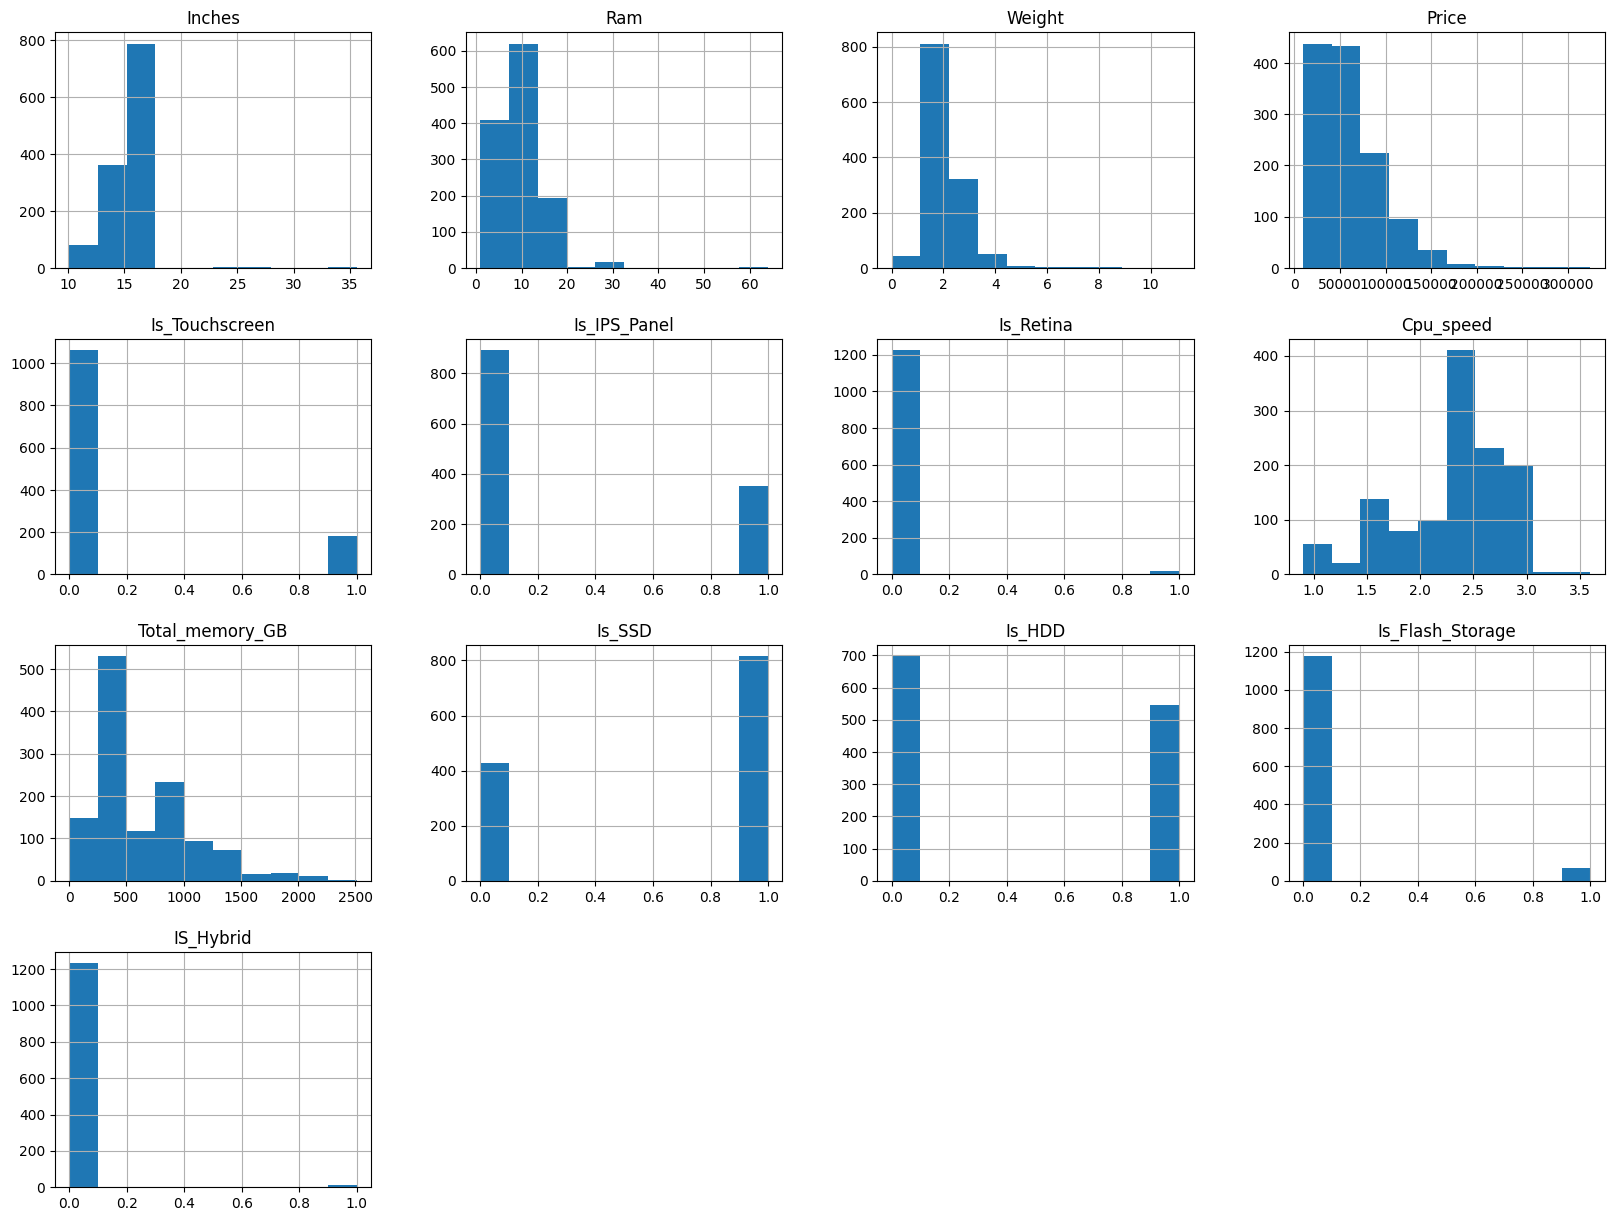

In [ ]:
# histogram for newdf
newdf.hist(figsize=(20,15))
plt.title('Distribution')
plt.show()

**Imputation**


by histogram's we can say inches,price,ram,cpu_speed are skrewed so median is best for this so we implement median imputation for the following columns. and for weight its normal distribution so mean imputation will be good.

In [ ]:
newdf['Inches'].fillna(newdf['Inches'].median(),inplace=True)
newdf['Weight'].fillna(newdf['Weight'].mean(),inplace=True)
newdf['Price'].fillna(newdf['Price'].median(),inplace=True)
newdf['Cpu_speed'].fillna(newdf['Cpu_speed'].median(),inplace=True)
newdf['Ram'].fillna(newdf['Ram'].median(),inplace=True)

<ipython-input-66-4ec3aa8d77cc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  newdf['Inches'].fillna(newdf['Inches'].median(),inplace=True)
<ipython-input-66-4ec3aa8d77cc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
newdf.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
Ram,0
OpSys,0
Weight,0
Price,0
Resolution,0
Is_Touchscreen,0
Is_IPS_Panel,0


In [ ]:
newdf.dtypes

,0
Company,object
TypeName,object
Inches,float64
Ram,float64
OpSys,object
Weight,float64
Price,float64
Resolution,object
Is_Touchscreen,int64
Is_IPS_Panel,int64


**outlier detection by boxplot.**

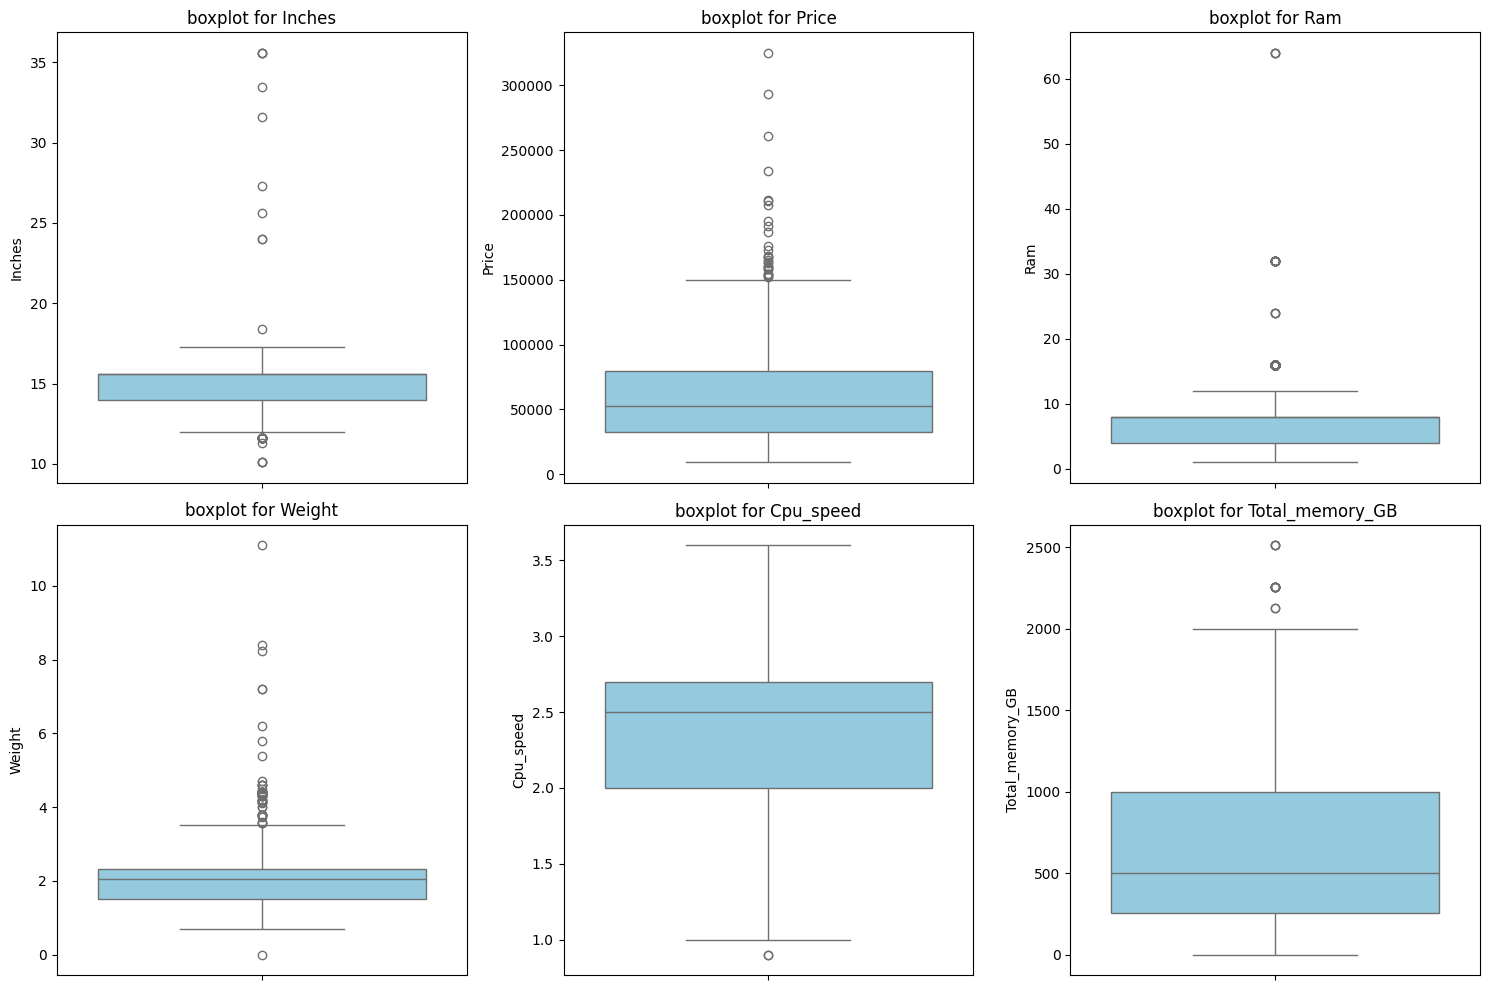

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['Inches', 'Price', 'Ram', 'Weight', 'Cpu_speed','Total_memory_GB']

plt.figure(figsize=(15, 10))
for i,col in enumerate(numerical_features,1):
  plt.subplot(2,3,i)
  sns.boxplot(y=newdf[col],color='skyblue')
  plt.title(f'boxplot for {col}')
  plt.tight_layout()
plt.show()



as the weight column is normally distributed i used zscore for outlier treatment

In [ ]:
# zscore for weight
from scipy import stats
from scipy.stats import zscore
col1 = ['Weight']
z_score = np.abs(zscore(newdf[col1]))
newdf = newdf[(z_score < 2).all(axis=1)]
print("Original data shape: ", df.shape)
print("After Z-Score Outlier Removal:", newdf.shape)



Original data shape:  (1303, 28)
After Z-Score Outlier Removal: (1192, 21)


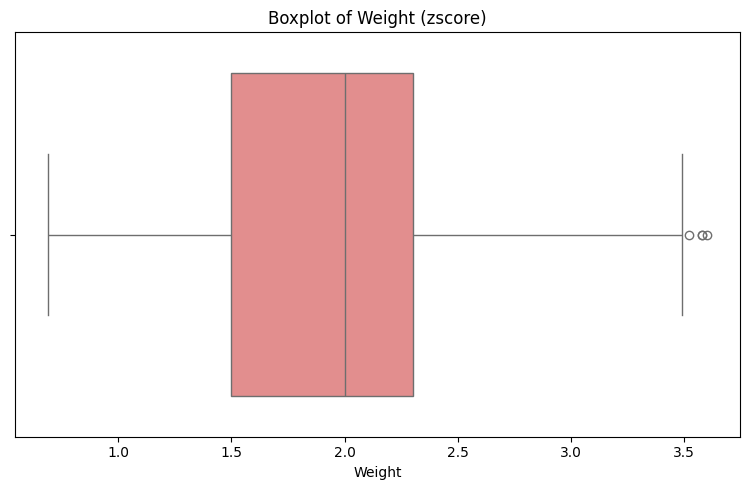

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

for i, col in enumerate(col1, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=newdf[col], color='lightcoral')
    plt.title(f'Boxplot of {col} (zscore)')

plt.tight_layout()
plt.show()


Genarally maximum laptop weight lies from 3kg - 3.5kg so i removed above 3.5 using zscore.

In [ ]:
# iqr for columns like inches,cpu_speed
col2 = ['Inches','Cpu_speed']
for i in col2:
  Q1 = newdf[i].quantile(0.25)
  Q3 = newdf[i].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  newdf = newdf[(newdf[i] >= lower) & (newdf[i] <= upper)]

print('After IQR: ',newdf.shape)




After IQR:  (1149, 21)


for a laptop maximum inches will be from 16-17 inches so i removed outliers which are above this level by iqr as they were skewred.

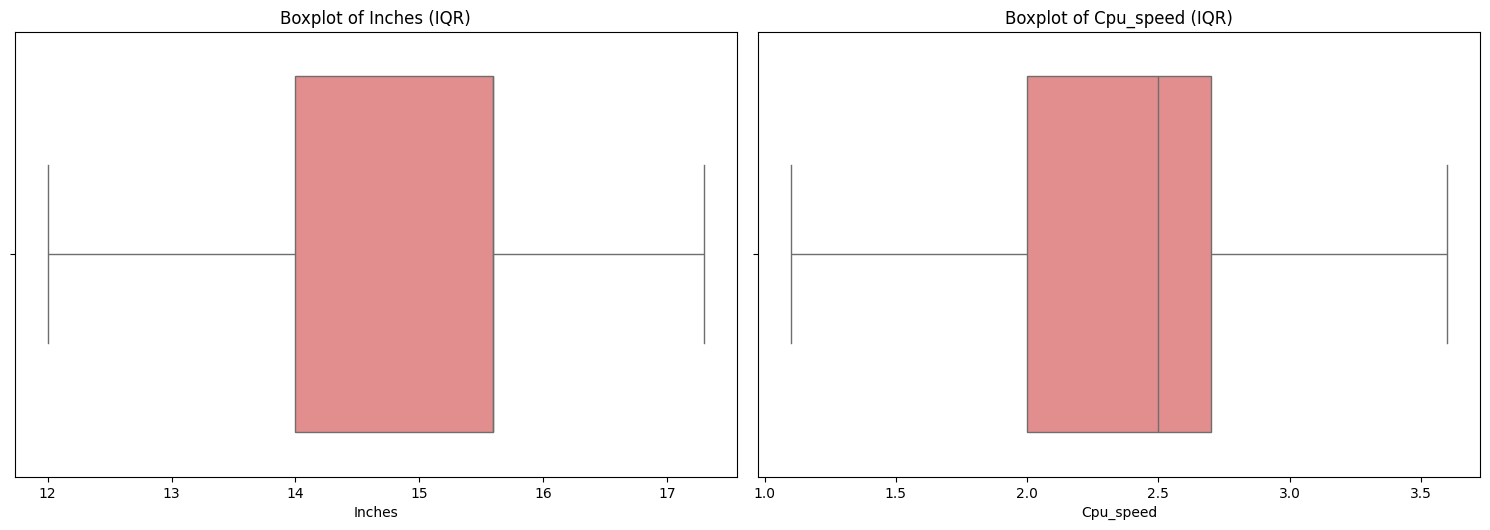

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

for i, col in enumerate(col2, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=newdf[col], color='lightcoral')
    plt.title(f'Boxplot of {col} (IQR)')

plt.tight_layout()
plt.show()

here am keeping outliers for the price,Ram,Total_memory because price are high for specific features,same goes with ram and total memory

**Feature Scaling**

In [ ]:
newdf.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Resolution,Is_Touchscreen,Is_IPS_Panel,...,Resolution_Category,CPU_Brand,CPU_Type,Cpu_speed,Gpu_Brand,Total_memory_GB,Is_SSD,Is_HDD,Is_Flash_Storage,IS_Hybrid
0,Apple,Ultrabook,13.3,8.0,macOS,1.37,71378.6832,2560x1600,0,1,...,Other,Intel,i5,2.3,Intel,128,1,0,0,0
1,Apple,Ultrabook,13.3,8.0,macOS,1.34,47895.5232,1440x900,0,0,...,Other,Intel,i5,1.8,Intel,128,0,0,1,0
2,HP,Notebook,15.6,8.0,No OS,1.86,30636.0000,1920x1080,0,0,...,Full HD,Intel,i5,2.5,Intel,256,1,0,0,0
3,Apple,Ultrabook,15.4,16.0,macOS,1.83,135195.3360,2880x1800,0,1,...,Other,Intel,i7,2.7,AMD,512,1,0,0,0
4,Apple,Ultrabook,13.3,8.0,macOS,1.37,96095.8080,2560x1600,0,1,...,Other,Intel,i5,3.1,Intel,256,1,0,0,0


--> min-max scaling for inches,Cpu_speed as they are not-normally distributed and no outliers are there,as we removed.


--> Robust Scaling for Ram,Price,Total_memory as we kept outliers because they are important to keep and outliers exist,so robust is   good choice.


--> Standard scaler for Weight as it is normal distribution.

In [ ]:
# Min-max for inches,cpu_speed
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
newdf[['Inches','Cpu_speed']] = scaler.fit_transform(newdf[['Inches','Cpu_speed']])
print(newdf[['Inches','Cpu_speed']])

        Inches  Cpu_speed
0     0.245283       0.48
1     0.245283       0.28
2     0.679245       0.56
3     0.641509       0.64
4     0.245283       0.80
...        ...        ...
1269  0.679245       0.56
1270  0.377358       0.56
1271  0.245283       0.56
1272  0.377358       0.20
1273  0.679245       0.56

[1149 rows x 2 columns]


In [ ]:
# Robust scaling for Total_memory_Gb,Ram
from sklearn.preprocessing import RobustScaler
scaler1 = RobustScaler()
newdf[['Ram','Total_memory_GB']] = scaler1.fit_transform(newdf[['Ram','Total_memory_GB']])
print(newdf[['Ram','Total_memory_GB']])

      Ram  Total_memory_GB
0     0.0        -0.500000
1     0.0        -0.500000
2     0.0        -0.327957
3     2.0         0.016129
4     0.0        -0.327957
...   ...              ...
1269 -1.0         0.000000
1270 -1.0        -0.500000
1271  2.0         0.016129
1272 -1.5        -0.586022
1273 -0.5         0.672043

[1149 rows x 2 columns]


In [ ]:
# Robust scaling for price,Ram
from sklearn.preprocessing import RobustScaler
scaler3 = RobustScaler()
newdf[['Price']] = scaler3.fit_transform(newdf[['Price']])
print(newdf[['Price']])

         Price
0     0.428420
1    -0.108491
2    -0.503106
3     1.887502
4     0.993544
...        ...
1269 -0.326081
1270 -0.426361
1271  0.622488
1272 -0.924595
1273 -0.272871

[1149 rows x 1 columns]


In [ ]:
# Standard Scaler for Weight
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
newdf[['Weight']] = scaler2.fit_transform(newdf[['Weight']])
print(newdf[['Weight']])

        Weight
0    -1.176985
1    -1.233823
2    -0.248627
3    -0.305465
4    -1.176985
...        ...
1269  0.395540
1270 -0.362304
1271 -1.309608
1272 -0.930686
1273  0.376594

[1149 rows x 1 columns]


In [ ]:
newdf

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Resolution,Is_Touchscreen,Is_IPS_Panel,...,Resolution_Category,CPU_Brand,CPU_Type,Cpu_speed,Gpu_Brand,Total_memory_GB,Is_SSD,Is_HDD,Is_Flash_Storage,IS_Hybrid
0,Apple,Ultrabook,0.245283,0.0,macOS,-1.176985,0.428420,2560x1600,0,1,...,Other,Intel,i5,0.48,Intel,-0.500000,1,0,0,0
1,Apple,Ultrabook,0.245283,0.0,macOS,-1.233823,-0.108491,1440x900,0,0,...,Other,Intel,i5,0.28,Intel,-0.500000,0,0,1,0
2,HP,Notebook,0.679245,0.0,No OS,-0.248627,-0.503106,1920x1080,0,0,...,Full HD,Intel,i5,0.56,Intel,-0.327957,1,0,0,0
3,Apple,Ultrabook,0.641509,2.0,macOS,-0.305465,1.887502,2880x1800,0,1,...,Other,Intel,i7,0.64,AMD,0.016129,1,0,0,0
4,Apple,Ultrabook,0.245283,0.0,macOS,-1.176985,0.993544,2560x1600,0,1,...,Other,Intel,i5,0.80,Intel,-0.327957,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,0.679245,-1.0,Windows,0.395540,-0.326081,1366x768,0,0,...,Other,Intel,i7,0.56,Nvidia,0.000000,0,1,0,0
1270,Lenovo,2 in 1 Convertible,0.377358,-1.0,Windows,-0.362304,-0.426361,1920x1080,1,1,...,Full HD,Intel,i7,0.56,Intel,-0.500000,1,0,0,0
1271,Lenovo,2 in 1 Convertible,0.245283,2.0,Windows,-1.309608,0.622488,3200x1800,1,1,...,Quad HD+,Intel,i7,0.56,Intel,0.016129,1,0,0,0
1272,Lenovo,Notebook,0.377358,-1.5,Windows,-0.930686,-0.924595,1366x768,0,0,...,Other,Intel,Celeron,0.20,Intel,-0.586022,0,0,1,0


In [ ]:
newdf = newdf.reset_index(drop=True) # reseting the index.

**Categorical Encoding**

In [ ]:
newdf.dtypes

,0
Company,object
TypeName,object
Inches,float64
Ram,float64
OpSys,object
Weight,float64
Price,float64
Resolution,object
Is_Touchscreen,int64
Is_IPS_Panel,int64


In [ ]:
# encoding for company,typename,OPsys,Resolution_category,'CPU_Brand'

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
newdf['Company_Encoded'] = le.fit_transform(newdf['Company'])



we are encoding the company,and Gpu_brand with label encoding,as it encoperates in a single column,and the priority is not matter here.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
newdf['Gpu_Brand_Encoded'] = le.fit_transform(newdf['Gpu_Brand'])

In [ ]:
cpu_type_freq = newdf['CPU_Type'].value_counts(normalize=True)
newdf['CPU_Type_Encoded'] = newdf['CPU_Type'].map(cpu_type_freq)

we are encoding Cpu type with frequency as per the count of each categorical variable,beacuse one hot encoding creates too many columns in the dataset.

In [ ]:
newdf

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Resolution,Is_Touchscreen,Is_IPS_Panel,...,Cpu_speed,Gpu_Brand,Total_memory_GB,Is_SSD,Is_HDD,Is_Flash_Storage,IS_Hybrid,Company_Encoded,Gpu_Brand_Encoded,CPU_Type_Encoded
0,Apple,Ultrabook,0.245283,0.0,macOS,-1.176985,0.428420,2560x1600,0,1,...,0.48,Intel,-0.500000,1,0,0,0,1,2,0.350740
1,Apple,Ultrabook,0.245283,0.0,macOS,-1.233823,-0.108491,1440x900,0,0,...,0.28,Intel,-0.500000,0,0,1,0,1,2,0.350740
2,HP,Notebook,0.679245,0.0,No OS,-0.248627,-0.503106,1920x1080,0,0,...,0.56,Intel,-0.327957,1,0,0,0,7,2,0.350740
3,Apple,Ultrabook,0.641509,2.0,macOS,-0.305465,1.887502,2880x1800,0,1,...,0.64,AMD,0.016129,1,0,0,0,1,0,0.395997
4,Apple,Ultrabook,0.245283,0.0,macOS,-1.176985,0.993544,2560x1600,0,1,...,0.80,Intel,-0.327957,1,0,0,0,1,2,0.350740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,Asus,Notebook,0.679245,-1.0,Windows,0.395540,-0.326081,1366x768,0,0,...,0.56,Nvidia,0.000000,0,1,0,0,2,3,0.395997
1145,Lenovo,2 in 1 Convertible,0.377358,-1.0,Windows,-0.362304,-0.426361,1920x1080,1,1,...,0.56,Intel,-0.500000,1,0,0,0,10,2,0.395997
1146,Lenovo,2 in 1 Convertible,0.245283,2.0,Windows,-1.309608,0.622488,3200x1800,1,1,...,0.56,Intel,0.016129,1,0,0,0,10,2,0.395997
1147,Lenovo,Notebook,0.377358,-1.5,Windows,-0.930686,-0.924595,1366x768,0,0,...,0.20,Intel,-0.586022,0,0,1,0,10,2,0.045257


one hot encoding for typename,opsys,Resolution_category,Cpu_brand

In [ ]:
# One-hot encoding for 'TypeName'
dummies_typename = pd.get_dummies(newdf['TypeName'], prefix='TypeName', drop_first=True)
dummies_typename = dummies_typename.astype(int)
newdf = pd.concat([newdf.drop('TypeName', axis=1), dummies_typename], axis=1)

# One-hot encoding for 'OpSys'
dummies_opsys = pd.get_dummies(newdf['OpSys'], prefix='OpSys', drop_first=True)
dummies_opsys = dummies_opsys.astype(int)
newdf = pd.concat([newdf.drop('OpSys', axis=1), dummies_opsys], axis=1)

# One-hot encoding for 'Resolution_Category'
dummies_res = pd.get_dummies(newdf['Resolution_Category'], prefix='Resolution', drop_first=True)
dummies_res = dummies_res.astype(int)
newdf = pd.concat([newdf.drop('Resolution_Category', axis=1), dummies_res], axis=1)

# One-hot encoding for 'CPU_Brand'
dummies_cpu_brand = pd.get_dummies(newdf['CPU_Brand'], prefix='CPU_Brand', drop_first=True)
dummies_cpu_brand = dummies_cpu_brand.astype(int)
newdf = pd.concat([newdf.drop('CPU_Brand', axis=1), dummies_cpu_brand], axis=1)

# View result
print(newdf.head())


  Company    Inches  Ram    Weight     Price Resolution  Is_Touchscreen  \
0   Apple  0.245283  0.0 -1.176985  0.428420  2560x1600               0   
1   Apple  0.245283  0.0 -1.233823 -0.108491   1440x900               0   
2      HP  0.679245  0.0 -0.248627 -0.503106  1920x1080               0   
3   Apple  0.641509  2.0 -0.305465  1.887502  2880x1800               0   
4   Apple  0.245283  0.0 -1.176985  0.993544  2560x1600               0   

   Is_IPS_Panel  Is_Retina CPU_Type  ...  OpSys_Linux OpSys_No OS  \
0             1          1       i5  ...            0           0   
1             0          0       i5  ...            0           0   
2             0          0       i5  ...            0           1   
3             1          1       i7  ...            0           0   
4             1          1       i5  ...            0           0   

   OpSys_Windows  OpSys_macOS  Resolution_Full HD  Resolution_Other  \
0              0            1                   0              

In [ ]:
newdf.head()

,Company,Inches,Ram,Weight,Price,Resolution,Is_Touchscreen,Is_IPS_Panel,Is_Retina,CPU_Type,...,OpSys_Linux,OpSys_No OS,OpSys_Windows,OpSys_macOS,Resolution_Full HD,Resolution_Other,Resolution_Quad HD+,Resolution_Unknown,CPU_Brand_Intel,CPU_Brand_Samsung
0,Apple,0.245283,0.0,-1.176985,0.428420,2560x1600,0,1,1,i5,...,0,0,0,1,0,1,0,0,1,0
1,Apple,0.245283,0.0,-1.233823,-0.108491,1440x900,0,0,0,i5,...,0,0,0,1,0,1,0,0,1,0
2,HP,0.679245,0.0,-0.248627,-0.503106,1920x1080,0,0,0,i5,...,0,1,0,0,1,0,0,0,1,0
3,Apple,0.641509,2.0,-0.305465,1.887502,2880x1800,0,1,1,i7,...,0,0,0,1,0,1,0,0,1,0
4,Apple,0.245283,0.0,-1.176985,0.993544,2560x1600,0,1,1,i5,...,0,0,0,1,0,1,0,0,1,0


In [ ]:
newdf.dtypes

,0
Company,object
Inches,float64
Ram,float64
Weight,float64
Price,float64
Resolution,object
Is_Touchscreen,int64
Is_IPS_Panel,int64
Is_Retina,int64
CPU_Type,object


In [ ]:
newdf.columns


Index(['Company', 'Inches', 'Ram', 'Weight', 'Price', 'Resolution',
       'Is_Touchscreen', 'Is_IPS_Panel', 'Is_Retina', 'CPU_Type', 'Cpu_speed',
       'Gpu_Brand', 'Total_memory_GB', 'Is_SSD', 'Is_HDD', 'Is_Flash_Storage',
       'IS_Hybrid', 'Company_Encoded', 'Gpu_Brand_Encoded', 'CPU_Type_Encoded',
       'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook',
       'TypeName_Ultrabook', 'TypeName_Workstation', 'OpSys_Linux',
       'OpSys_No OS', 'OpSys_Windows', 'OpSys_macOS', 'Resolution_Full HD',
       'Resolution_Other', 'Resolution_Quad HD+', 'Resolution_Unknown',
       'CPU_Brand_Intel', 'CPU_Brand_Samsung'],
      dtype='object')

**Model Development**

In [ ]:
# Train Test Split

In [ ]:
newdf.columns

Index(['Company', 'Inches', 'Ram', 'Weight', 'Price', 'Resolution',
       'Is_Touchscreen', 'Is_IPS_Panel', 'Is_Retina', 'CPU_Type', 'Cpu_speed',
       'Gpu_Brand', 'Total_memory_GB', 'Is_SSD', 'Is_HDD', 'Is_Flash_Storage',
       'IS_Hybrid', 'Company_Encoded', 'Gpu_Brand_Encoded', 'CPU_Type_Encoded',
       'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook',
       'TypeName_Ultrabook', 'TypeName_Workstation', 'OpSys_Linux',
       'OpSys_No OS', 'OpSys_Windows', 'OpSys_macOS', 'Resolution_Full HD',
       'Resolution_Other', 'Resolution_Quad HD+', 'Resolution_Unknown',
       'CPU_Brand_Intel', 'CPU_Brand_Samsung'],
      dtype='object')

as price is our target variable so we are dropping priice form newdf

In [ ]:
X = newdf.drop('Price', axis=1)
y = newdf['Price']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


applying train-test split for the newdf as it learns from the dataset.

In [ ]:
X.dtypes[X.dtypes == 'object']


,0
Company,object
Resolution,object
CPU_Type,object
Gpu_Brand,object


check for the object data type and removing object from the newdf as the newdf consist's of encoded values which leads to more efficiency.

**Implementing Linear Regression.**

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define target and features
y = newdf['Price']
X = newdf.drop(['Price', 'Company', 'Resolution', 'CPU_Type', 'Gpu_Brand'], axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
lr_pred = lr_model.predict(X_test)

# Evaluate
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_pred)

# Print Results
print("📈 Linear Regression Metrics")
print("----------------------------")
print(f"✅ R2 Score : {lr_r2}")
print(f"✅ MAE      : {lr_mae}")
print(f"✅ MSE      : {lr_mse}")
print(f"✅ RMSE     : {lr_rmse}")


📈 Linear Regression Metrics
----------------------------
✅ R2 Score : 0.6697310096374572
✅ MAE      : 0.3053083890083767
✅ MSE      : 0.20265899500786977
✅ RMSE     : 0.4501766264566273


from the linear Regression metrics R2 score is 0.66 variation is there among predicting the price. MAE : Averge error size 0.30


***Implementing Random Forest Regression ***




In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define target and features
y = newdf['Price']
X = newdf.drop(['Price', 'Company', 'Resolution', 'CPU_Type', 'Gpu_Brand'], axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

# Print Results
print("🌲 Random Forest Regressor Metrics")
print("----------------------------------")
print(f"✅ R2 Score : {rf_r2}")
print(f"✅ MAE      : {rf_mae}")
print(f"✅ MSE      : {rf_mse}")
print(f"✅ RMSE     : {rf_rmse}")


🌲 Random Forest Regressor Metrics
----------------------------------
✅ R2 Score : 0.7040299055190719
✅ MAE      : 0.22955529411169248
✅ MSE      : 0.18161257535576333
✅ RMSE     : 0.42616026956505854


as the above output shows the R2 : 0.70 percent variation is there among price prediction,
MAE : average error size 0.22

In [ ]:
pip install xgboost

**implementing xgboost to predict laptop price.**

In [ ]:
import xgboost as xgb

# Define target and features
y = newdf['Price']
X = newdf.drop(['Price', 'Company', 'Resolution', 'CPU_Type', 'Gpu_Brand'], axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost
xgb_model = xgb.XGBRegressor(random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)

# Predict
xgb_pred = xgb_model.predict(X_test)

# Evaluate
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_pred)

# Print Results
print("🚀 XGBoost Regressor Metrics")
print("-----------------------------")
print(f"✅ R2 Score : {xgb_r2}")
print(f"✅ MAE      : {xgb_mae}")
print(f"✅ MSE      : {xgb_mse}")
print(f"✅ RMSE     : {xgb_rmse}")


🚀 XGBoost Regressor Metrics
-----------------------------
✅ R2 Score : 0.8146190911169703
✅ MAE      : 0.218974348146502
✅ MSE      : 0.11375306124453265
✅ RMSE     : 0.3372729773411037


In this XG boost model R2: 0.81 percent variation is there which is better than linear regression which was and random forest regression of ,so XG boost is performing well in terms of price variation,error size.

In [ ]:
# Hyperparameter for XG

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Define XGBoost regressor
xgb_model = xgb.XGBRegressor(random_state=42, verbosity=0)

# Parameter grid to search
param_grid = {
    'n_estimators': [100, 200],        # number of trees
    'max_depth': [3, 5, 7],            # max tree depth
    'learning_rate': [0.01, 0.1, 0.2],# step size shrinkage
    'subsample': [0.7, 1],             # fraction of samples used per tree
    'colsample_bytree': [0.7, 1],     # fraction of features used per tree
    'reg_alpha': [0, 0.1],             # L1 regularization term
    'reg_lambda': [1, 1.5]             # L2 regularization term
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # use MSE for scoring (lower is better)
    cv=3,                             # 3-fold cross-validation
    verbose=2,
    n_jobs=-1                         # use all CPU cores
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best estimator
best_xgb = grid_search.best_estimator_

# Predict with best model
y_pred = best_xgb.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best parameters found:  {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'subsample': 1}
R2 Score: 0.7948470116678942
MAE: 0.2125822771636289
MSE: 0.1258855649530006
RMSE: 0.3548035582586519


As we build ml model's such as linear Regression r2 score 0.66, Random Forest r2 score 0.70 and XG boost is of 0.80 r2 score so we choose XG Boost among all beacuse metric's score is better in term's of r2 score,MAE,MSE,RMSE.

Implementing real-time prediction of laptop price by Features.

In [ ]:
# 1. Train model first (if not already done)
xgb_model = xgb.XGBRegressor(random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)

# 2. Prepare new input as dataframe with exact columns as X_train (no raw objects)
new_laptop = {
    'Inches': 15.6,
    'Ram': 8.0,
    'Weight': 3.0,
    'Is_Touchscreen': 0,
    'Is_IPS_Panel': 1,
    'Is_Retina': 0,
    'Cpu_speed': 2.5,
    'Total_memory_GB': 512,
    'Is_SSD': 1,
    'Is_HDD': 0,
    'Is_Flash_Storage': 0,
    'IS_Hybrid': 0,
    'Company_Encoded': 1,
    'TypeName_Gaming': 0,
    'TypeName_Netbook': 0,
    'TypeName_Notebook': 1,
    'TypeName_Ultrabook': 0,
    'TypeName_Workstation': 0,
    'OpSys_Linux': 0,
    'OpSys_No OS': 0,
    'OpSys_Windows': 1,
    'OpSys_macOS': 0,
    'Resolution_Full HD': 1,
    'Resolution_Other': 0,
    'Resolution_Quad HD+': 0,
    'Resolution_Unknown': 0,
    'CPU_Brand_Intel': 1,
    'CPU_Brand_Samsung': 0,
    'Gpu_Brand_Encoded': 3,
    'CPU_Type_Encoded': 5
}

new_laptop_df = pd.DataFrame([new_laptop])
new_laptop_df = pd.DataFrame([new_laptop])[X_train.columns]

# 3. Predict
predicted_price = xgb_model.predict(new_laptop_df)
predicted_price_original = scaler3.inverse_transform([[predicted_price[0]]])
print(f"Predicted laptop price: {predicted_price[0]}")
print(f"Predicted laptop price (original scale): {predicted_price_original[0][0]}")




Predicted laptop price: 2.7884700298309326
Predicted laptop price (original scale): 174601.49293017198


by the following features we gave input,And our model is predicted
laptop price based on the above features.

**Business Question's**

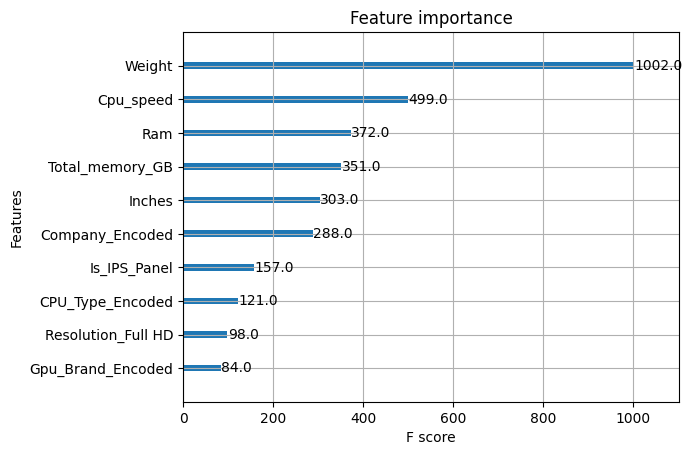

In [ ]:
# 1Q.Which features have the most significant impact on laptop prices?
# 1. Train the model
xgb_model = xgb.XGBRegressor(random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)

# 2. Plot feature importance
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model, max_num_features=10)
plt.show()



Company
Razer        178282.491429
LG           111834.720000
Google        89386.080000
MSI           85619.065600
Apple         84952.748880
Microsoft     83914.401600
Samsung       82930.320000
Huawei        75870.720000
Toshiba       67720.064000
Xiaomi        60390.882000
Dell          59412.837434
Asus          58317.140382
HP            58179.083314
Lenovo        58039.743477
Fujitsu       38574.720000
Acer          32392.960055
Chuwi         16745.726400
Mediacom      15682.080000
Vero          11584.404000
Name: Price, dtype: float64


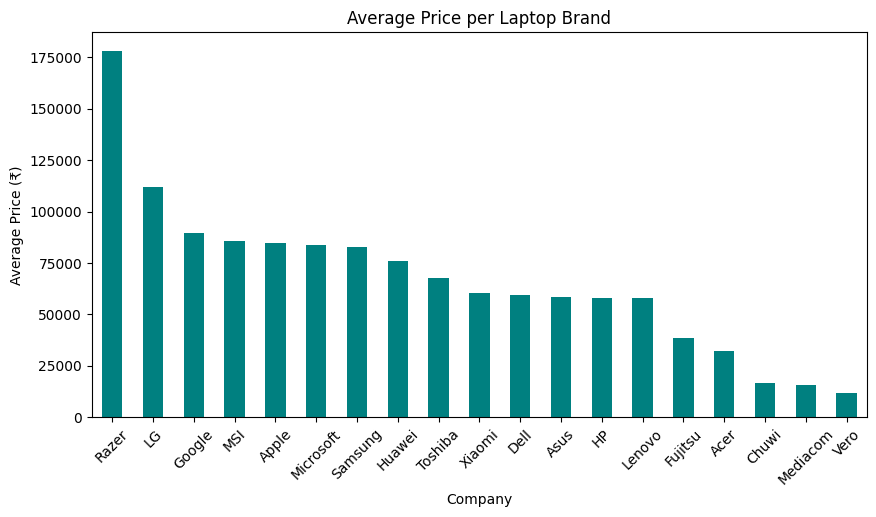

In [ ]:
# 2Q.Does the brand of the laptop significantly influence its price?
# Assuming original 'Company' column is still in newdf
avg_prices = newdf.copy()
avg_prices['Price'] = scaler3.inverse_transform(newdf[['Price']])  # get back original prices

brand_avg = avg_prices.groupby('Company')['Price'].mean().sort_values(ascending=False)
print(brand_avg)

# Plot
plt.figure(figsize=(10,5))
brand_avg.plot(kind='bar', color='teal')
plt.title('Average Price per Laptop Brand')
plt.ylabel('Average Price (₹)')
plt.xticks(rotation=45)
plt.show()


We analyzed the effect of laptop brands on price using visualizations, and feature importance. The results clearly show that well-known brands (like Razer,LG,Google,MSI,Apple) tend to have higher average prices, and the brand feature (Company_Encoded) was among the top 10 most important features in the XGBoost model. Thus, brand significantly influences laptop pricing.

In [ ]:
#3Q.How well does the model perform on laptops with high-end specifications compared to budget laptops?
# Predict on test data
y_pred_scaled = xgb_model.predict(X_test)

# ✅ Fix: Reshape y_test to 2D (n_samples, 1) before inverse transforming
y_test_actual = scaler3.inverse_transform(y_test.values.reshape(-1, 1))
y_pred_actual = scaler3.inverse_transform(y_pred_scaled.reshape(-1, 1))



In [ ]:
import numpy as np

# Define threshold
threshold = 80000

# Budget laptops
budget_mask = y_test_actual.flatten() < threshold
budget_actual = y_test_actual[budget_mask]
budget_pred = y_pred_actual[budget_mask]

# High-end laptops
highend_mask = y_test_actual.flatten() >= threshold
highend_actual = y_test_actual[highend_mask]
highend_pred = y_pred_actual[highend_mask]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Budget
budget_mae = mean_absolute_error(budget_actual, budget_pred)
budget_rmse = np.sqrt(mean_squared_error(budget_actual, budget_pred))

# High-end
highend_mae = mean_absolute_error(highend_actual, highend_pred)
highend_rmse = np.sqrt(mean_squared_error(highend_actual, highend_pred))


print("💸 Budget Laptops")
print(f"MAE  : ₹{budget_mae:.2f}")
print(f"RMSE : ₹{budget_rmse:.2f}\n")

print("💻 High-End Laptops")
print(f"MAE  : ₹{highend_mae:.2f}")
print(f"RMSE : ₹{highend_rmse:.2f}")



💸 Budget Laptops
MAE  : ₹6678.20
RMSE : ₹9559.52

💻 High-End Laptops
MAE  : ₹17791.80
RMSE : ₹23984.09


The model is more reliable for predicting budget laptops, with low MAE and RMSE. However, for high-end laptops, the prediction errors are noticeably higher.this because of high end specifiaction effects price.

In [ ]:
#4Q.Can the model accurately predict the prices of laptops from lesser-known brands?
# Example: MSI and Fujitsu are lesser-known in your dataset
lesser_known_brands = ['Vero', 'Mediacom','chuwi']

test_lesser_known = newdf[newdf['Company'].isin(lesser_known_brands)] # filtering brands
X_lesser = test_lesser_known.drop(['Price', 'Company', 'Resolution', 'CPU_Type', 'Gpu_Brand'], axis=1)
y_lesser = test_lesser_known['Price']


In [ ]:
# Make predictions
preds_lesser = rf_model.predict(X_lesser)

# Evaluate
from sklearn.metrics import r2_score, mean_absolute_error
print("Performance on Lesser-known Brands:")
print(f"R2 Score: {r2_score(y_lesser, preds_lesser):.2f}")
print(f"MAE     : {mean_absolute_error(y_lesser, preds_lesser):.2f}")


Performance on Lesser-known Brands:
R2 Score: 0.19
MAE     : 0.05


The model's performance on lesser-known laptop brands like Vero,Mediacom,chuwi was evaluated separately. Due to fewer examples of these brands in the training data, the model showed relatively lower accuracy (e.g., R² = 0.19) compared to well-known brands. This suggests that brand representation in training data significantly affects prediction reliability.

In [ ]:
# 5Q.What are the limitations and challenges in predicting laptop prices accurately?



*   The Major challanges was at the stage of data pre-processing we need to extract the all features which are present in a single column like extracting total memory,screen resolution,Ram,etc.
*   outlier treatment , where i have remmoved outliers in weight etc, and keeping the outliers in price as the premium brands have high price fluctuations.



